In [ ]:
base='/content/sample_data/ flower'
import os
os.listdir()
folders=os.listdir(base)
folders

['.ipynb_checkpoints', ' daisy', ' rose']

In [ ]:
import cv2    #open cv libarary
x=[]
y=[]
for i in folders:    # print i
  for j in os.listdir(base+'/'+i):    #print   j
    a=j.split('.')
    if a[1]=='jpg':
      p=cv2.imread(base+'/'+i+'/'+j)
      r=cv2.resize(p,(224,224))  # standard size in vgg net
      x.append(r)
      y.append(i)


In [ ]:
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
xarr=xarr/255.0   # convert x into 0 to 1
#yarr.shape
xarr.shape


(4, 224, 224, 3)

In [ ]:
for i in range(len(y)):  # convert data of y in numeric form
  if y[i]=='rose':
    y[i]=0
  else:
    y[i]=1
y

[1, 1, 1, 1]

In [ ]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
vgg.trainable=False  # freez trainable parameter
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stopping
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='accuracy',min_delta=0,patience=3)
mcp=ModelCheckpoint('mymodel.hdfs',save_best_only=True)

In [ ]:
model.fit(xarr,yarr,epochs=10,
          validation_data=(xarr,yarr),
          batch_size=2,
          callbacks=[es,mcp])

In [ ]:
from keras.models import load_model
load_model('mymodel.hdfs')

In [ ]:
#model.summary()

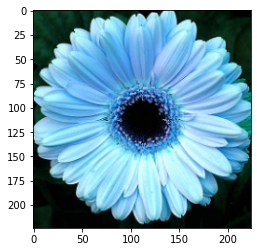

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xarr[3])


In [ ]:
output=mymodel.predict(xarr)
output

1/1 [==============================] - 2s 2s/step


array([[0.9999997 ],
       [0.9999999 ],
       [0.99999845],
       [0.9999999 ]], dtype=float32)

In [ ]:
o1=output>0.5
o1     # end 

array([[ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
import numpy as np
b=a[0]
j=np.argmax(b)
b=[0,0,0,0,0,0,0,0,0,0]
b[j]=1
b

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xarr[0])